# <a href="https://thetahat.ru/">BioMed@DataScience</a>


## Семинар 3

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_bmds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**


In [29]:
import numpy as np
import matplotlib.pyplot as plt

# обратите внимание, что Scikit-Learn импортируется как sklearn
from sklearn import datasets
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# фиксируем seed для воспроизводимости результатов
random_state = 42

## Задача 1

**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ для обучающей и тестовой выборок.

In [30]:
digits = datasets.load_digits()
n_samples = len(digits["images"])
X, y = digits["images"].reshape(n_samples, -1), digits["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [31]:
accs_train = []
accs_test = []

for k in range(1,20):
  knn = KNeighborsClassifier(n_neighbors=k) # инициализация модели
  knn.fit(X_train, y_train) # обучения модели
  accs_train.append(accuracy_score(y_train, knn.predict(X_train))) # предсказание модели и расчет метрик
  accs_test.append(accuracy_score(y_test, knn.predict(X_test)))

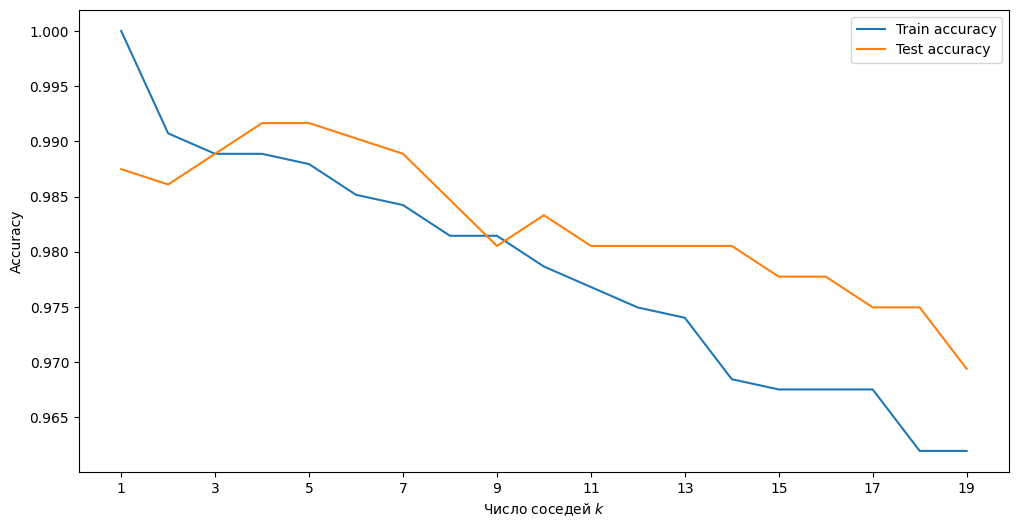

In [32]:
plt.figure(figsize=(12,6))
plt.plot(range(1,20), accs_train, label='Train accuracy')
plt.plot(range(1,20), accs_test, label='Test accuracy')
plt.legend()
plt.xticks(range(1,20,2))
plt.xlabel(r'Число соседей $k$')
plt.ylabel('Accuracy');

&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

&#x1f4a1; **Ответ**: в случае k=1 алгоритм выбирает и учитывает только одного самого близкого соседа, то есть самого себя. В таком случае, конечно же, точность будет максимальной, так как при выборе самого себя не будет пере-/недообучения.

Сделайте выводы о характере зависимости кривых качества на трейне и тесте. Чем может быть обусловлена такая зависимость?

**Вывод:**
Train начинается с k=1 и со 100%, а затем плавно падает.
Test сначала растёт, достигает максимума, затем падает.

То есть в начале тестовая кривая поднимается, т.к. происходит обучение, затем идёт промежуток оптимальной модели, а затем начинается переобучение (линии начинают расходиться после k=11). Скорее всего для больших k модель, которой обучились, стала слишком простой и неподходящей.

---
© 2025 команда <a href="https://thetahat.ru/">ThetaHat</a> для BioMed@DataScience